In [2]:
# Intsall matplotlib, seaborn and scipy libraries using the anaconda prompt 

In [1]:
# Import all the necessary libraries 

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set a path string

path=r"C:\Users\Lemlem TH\Desktop\CareerFoundry\Course\Data Immersion\Achievement 4\Instacart Basket Analysis"


In [3]:
# Import the dataset ords_prods_merge_derived_agg.pkl as ords_prods_merge

ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_derived_agg.pkl'))

# Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

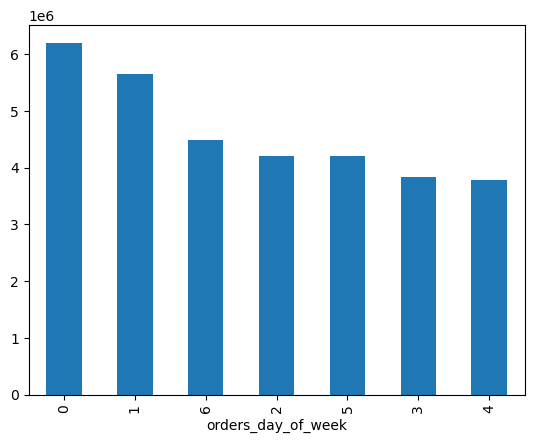

In [4]:
# Creat a bar chart for the orders_day_of_week 
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

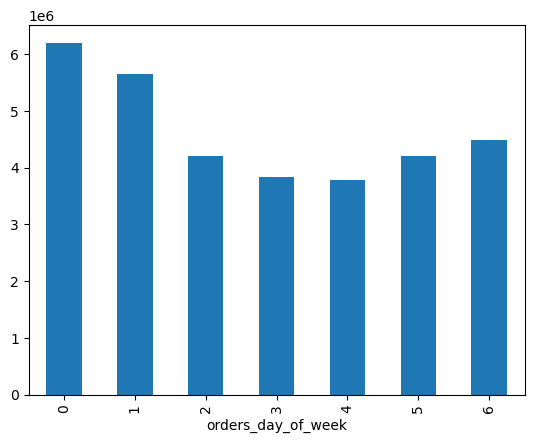

In [5]:
# Change the order of the bar (to according to the thier index order)
bar=ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

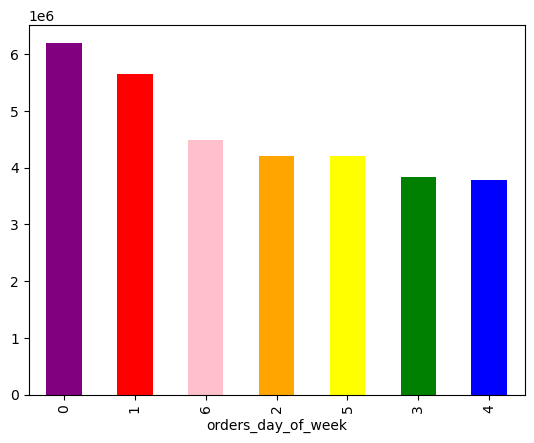

In [6]:
# Change the colour of the bar 
bar=ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink','orange', 'yellow', 'green', 'blue'])

## Exporting Charts

In [7]:
# Exporting the 'bar' object created above to the 'visualizations' folder
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

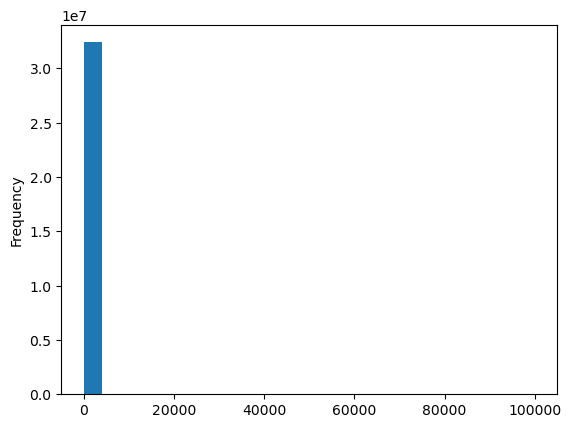

In [8]:
# Creating a histogram for the 'prices' column

ords_prods_merge['prices'].plot.hist(bins=25)

<Axes: xlabel='prices', ylabel='prices'>

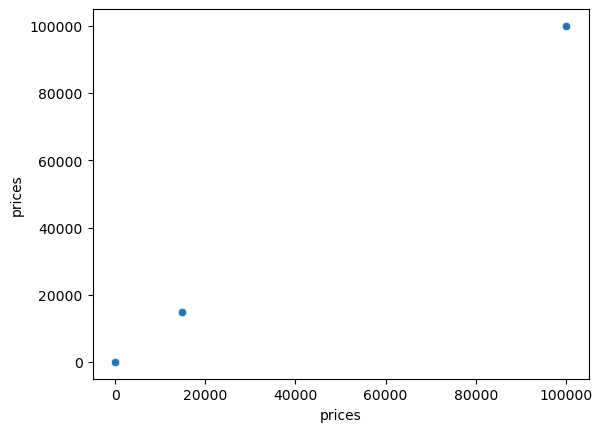

In [9]:
# Creating a scatter plot of the 'prices' column to explor outliers
sns.scatterplot(x='prices', y='prices', data=ords_prods_merge)


In [10]:
# Identifying records with outliers (above an expected value for example 100)

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]


,order_id,user_id,order_number,orders_day_of_week,hour_at_time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,price_range_loc,busiest_day,busiest_days,busiest_periods_of_day,max_order,loyalty_flag,avg_spending,spending_flag,ord_freq,order_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,21554,...,High-range product,Regularly busy,Regularly days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,21554,...,High-range product,Regularly busy,Regularly days,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,21554,...,High-range product,Regularly busy,Regularly days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,21554,...,High-range product,Busiest day,Busiest days,Most orders,4,New customer,1154.792308,High spender,11.5,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,21554,...,High-range product,Regularly busy,Busiest days,Most orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,33666,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,33666,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,33666,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,451.153540,High spender,4.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,33666,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


In [11]:
# Turning oulier values into NaN(missing)

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan


In [12]:
# Check the max value to crosscheck if outliers are all removed

ords_prods_merge['prices'].max()

25.0

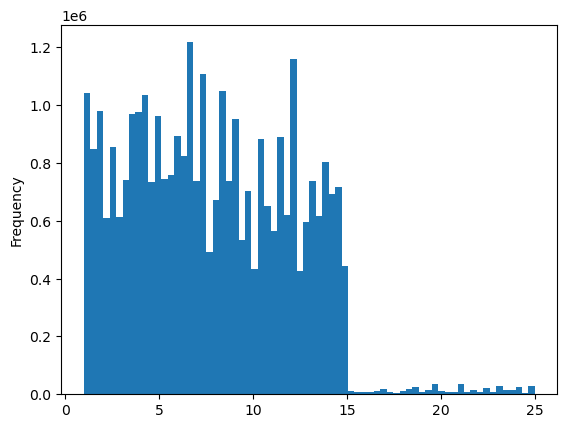

In [13]:
# Creating a histogram for the 'prices' column ( now with a clean data)

hist=ords_prods_merge['prices'].plot.hist(bins=70)

In [14]:
# Exporting the 'hist' object created above to the 'visualizations' folder
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price.png'))

# Creating Line Charts

In [15]:
# Creating a subset of data through sampling technique (otherwise we will face memory issue with the current big data set). First step is to set the seed for the random number generator

np.random.seed(4)


In [16]:
# Creat a list holding Tue/False values to the test np.random.rant()<=0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7


In [17]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]


In [18]:
# Store 30% of the dataframe in the dataframe small

small = ords_prods_merge[~dev]

In [19]:
# Cheack the new dataframes to see if sunsetting was successful. W/r the sum of rows of the two new dataframe is equal to the original one

len(ords_prods_merge)

32404859

In [20]:
len(big)+len(small)

32404859

In [21]:
# To speed up the process filter only those important columns (i.e., 'prices' and 'orders_day_of_week' columns)

df_2 = small[['orders_day_of_week','prices']]

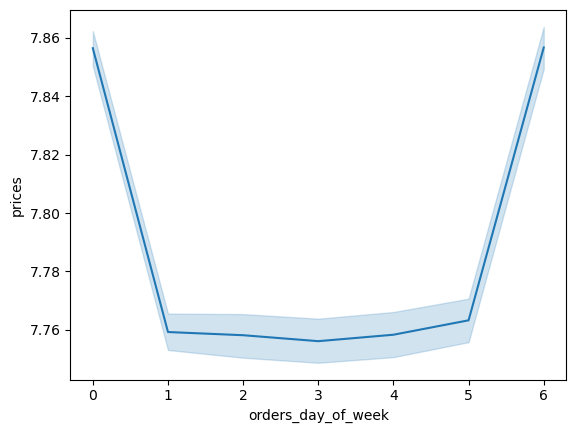

In [22]:
# Create a line chart from the df_2 dataframe

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')